<a href="https://colab.research.google.com/github/juccaicedoac03/Data_Science_Course/blob/main/2_Supervised_learning/2_Regression_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real problem

**Objective:** To predict house prices acoording to the houses information from the 1990 California census.

**Data:** Kaggle dataset ([California Housing Prices](https://www.kaggle.com/camnugent/california-housing-prices)).

*Reference: Hands-On Machine Learning with Scikit-Learn and Tensor Flow 2017 (Cap 2) -- Aurélien Géron*


# Main steps for ML projects

1. Analyze the problem.
2. Get the data.
3. **EDA:** Exploratory Data Analysis (Data visualization and descriptive statistics)
4. Prepare data for machine learning algorithms (Data cleaning, Preprocessing and Feature extraction)
5. Select and train the ML model.
6. Hyperparameter/parameter tuning.
7. Show performance results.
8. Deploy the solution (Usually on cloud)
9. Maintaining the model.

# ML project

## Obtaining Kaggle dataset

1. Go to: Kaggle (Login) --> Account --> Create New API Token, and download "kaggle.json" file.

2. Save the Token file on Drive and get the public link (Share the file).

3. Load Token file on Colab.



In [ ]:
!gdown # Change link according to your token ID

Downloading...
From: https://drive.google.com/uc?id=1rCXJPBPJx_rwtM7sqS8_PthETz7Y6Mqj
To: /content/kaggle.json
100% 67.0/67.0 [00:00<00:00, 110kB/s]


4. Create kaggle folder for the Token file

In [ ]:
!mkdir -p ~/.kaggle/ && cp  /content/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

5. Download dataset using kaggle API

<img src="https://github.com/juccaicedoac03/Data_Science_Course/blob/main/2_Supervised_learning/Figs/kaggle_down.png?raw=true:, width=100" alt="find roots" width=800>

In [ ]:
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 94.2MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


## Import libraries

In [ ]:
import numpy as np 

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

## Read data

In [ ]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA (Basic)

In [ ]:
housing.info() # check amount of data, data types, empty fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts() #counting feature values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe() # basic statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Q:** What's the difference between mean and median? 

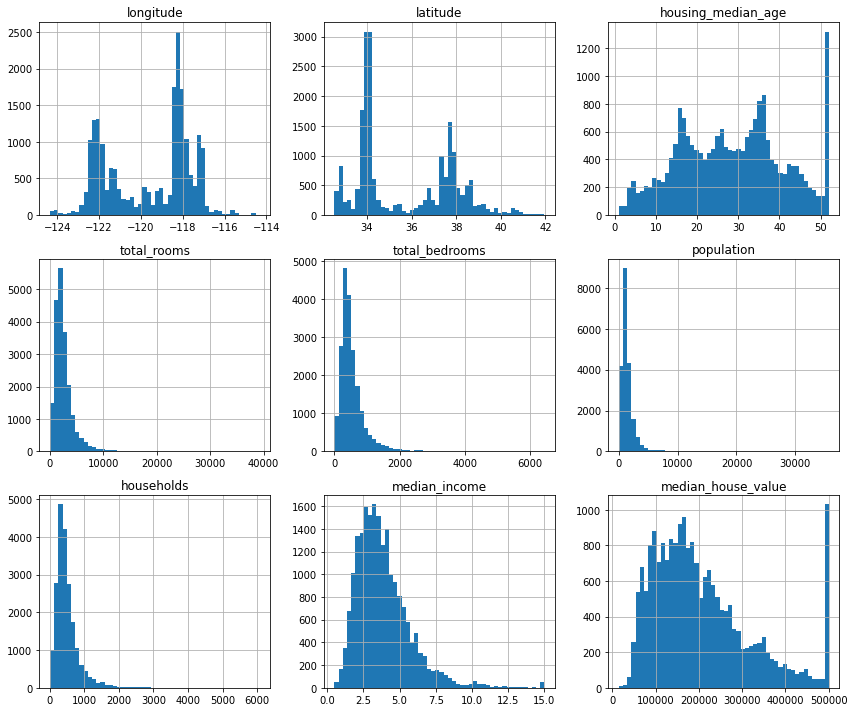

In [ ]:
housing.hist(bins=50, figsize=(12,10))
plt.tight_layout()
plt.show()

**Q:** EDA conclusion? 

**Q:** What about the histograms?

**Q:** What can you infer about the variable of interest from the histogram?


**Q:** Asimetric values? (see [quartiles](https://en.wikipedia.org/wiki/Interquartile_range))

## Prepare the data

In order to avoid **overfitting**, we use Train/Test partition

<img src="https://github.com/juccaicedoac03/Data_Science_Course/blob/main/2_Supervised_learning/Figs/crossvalidation.png?raw=true:, width=100" alt="find roots" width=800>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)#20% for Test partition

In [ ]:
print(train_set.shape,test_set.shape)

(16512, 10) (4128, 10)


In [ ]:
test_set.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


To avoid problems about imbalance partitions, it is recommended to use stratified sampling when there are asymmetric distributions in the distributions of the variables (imbalance).

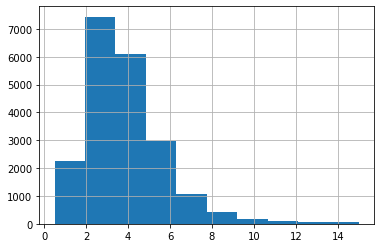

In [ ]:
housing["median_income"].hist()
plt.show()

*Process:* change median_income feature from continous to categorical

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]) # Thresholding

In [ ]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

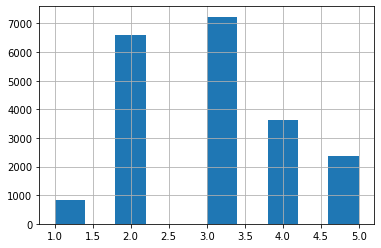

In [ ]:
housing["income_cat"].hist()
plt.show()

**NOTE:** In order to split data taking account variable inbalance we use stratified split method

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"].values): #variable to stratiffied: income_cat 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
test_index # row index from stratification process

array([ 5241, 17352,  3505, ..., 17223, 10786,  3965])

In [ ]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)# counting stratified train data

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)# counting stratified test data

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Error comparison between stratified data and original data

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({ # Creating dict to show results
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


Droping rows and columns of income_cat

In [ ]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

## Sampling data visualization 

In [ ]:
housing = strat_train_set.copy() # make data copy
housing.shape

(16512, 10)

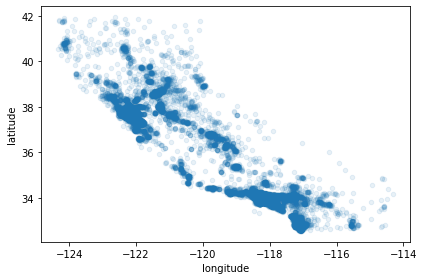

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1) # georeferenced visualization
plt.tight_layout()
plt.show()

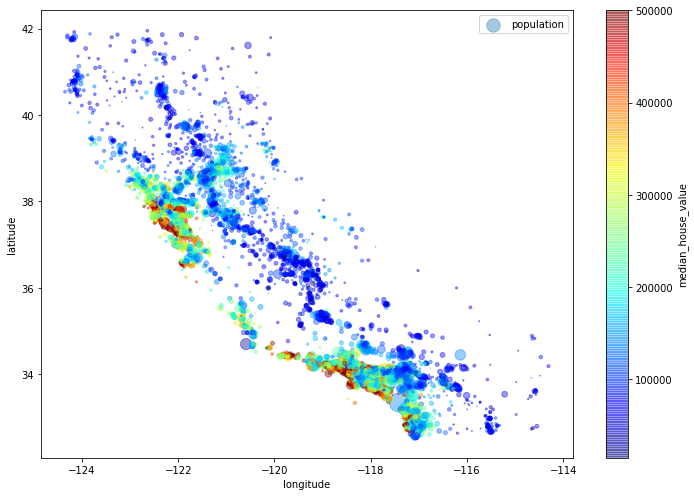

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.image as mpimg # For maps

In [ ]:
!gdown 1mjjLVFkpave6F7S7ngoE8IScJaMujutM

Downloading...
From: https://drive.google.com/uc?id=1mjjLVFkpave6F7S7ngoE8IScJaMujutM
To: /content/california.png
100% 10.0k/10.0k [00:00<00:00, 16.8MB/s]


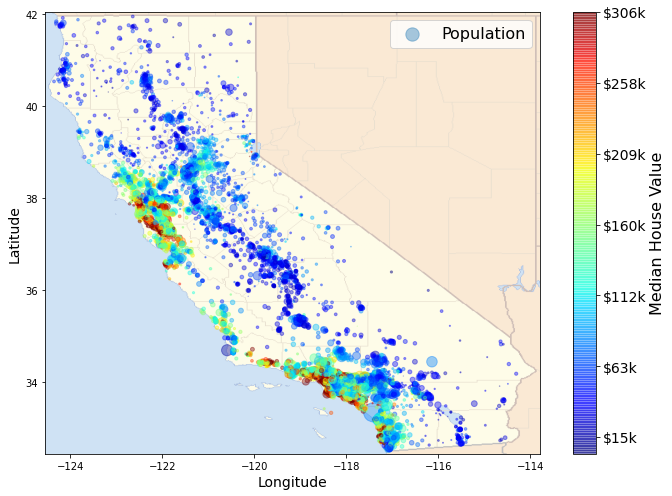

In [ ]:
california_img=mpimg.imread('/content/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

**Q:** Conclution about data visualization?

## Correlation

[Correlation](https://en.wikipedia.org/wiki/Correlation) ($R_{xy}$) is one of the basic measures to find linear relationships between features.

\\

$$R_{xy} = \mathbb{E}\{xy\}$$

$$\sigma_{xy} = \mathbb{E}\{(x-\mu_x)(y-\mu_y)\}$$ 

Where $\sigma_{xy}$ is the co-variance.

\\

**[Pearson coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)**: measure of linear correlation between two sets of data.

$$\rho_{xy} = \frac{\sigma_{xy} }{\sigma_{x}\sigma_y} \in [-1,1]$$

$$\sigma^2_x = \mathbb{E}\{(x-\mu_x)^2\}$$ 

$\sigma^{2}_{x}$ and $\sigma_x$ refer to the variance and standard deviation (std).

In [ ]:
corr_matrix = housing.corr() # correlation function 
corr_matrix.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [ ]:
import seaborn as sns # for special plots

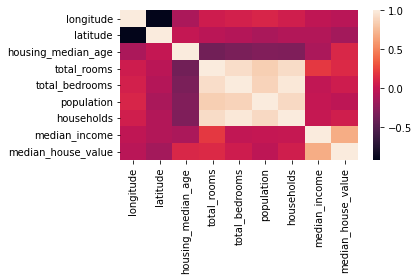

In [ ]:
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False) # Sort correlations from feature to predict

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix # import scatter matrix from pandas

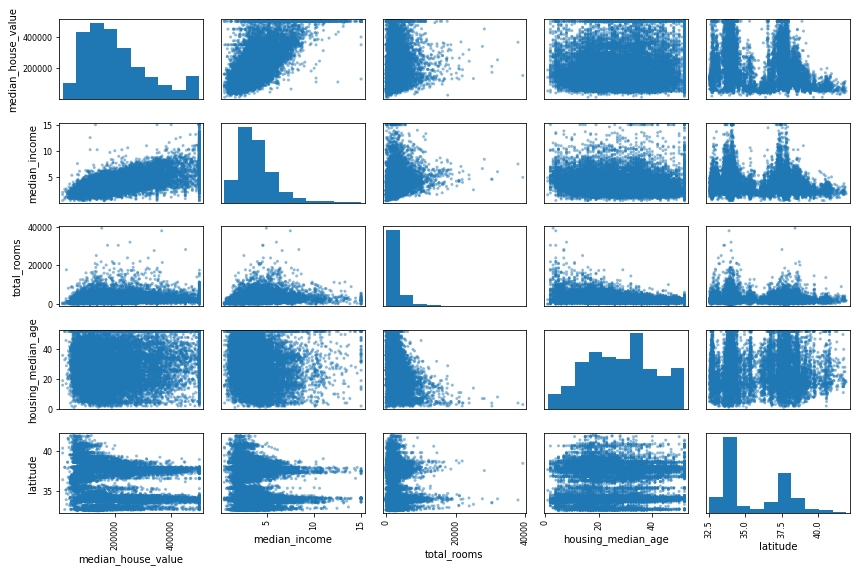

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age","latitude"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.tight_layout()
plt.show()

## Feature engineering

To generate new intuitive features.


In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [ ]:
corr_matrix = housing.corr() # calculate correlations with new features
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare data to machine learning models

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # Drop target
housing_labels = strat_train_set["median_house_value"].copy() # Select target from data

In [ ]:
housing.isnull().any(axis=1) # find Null rows

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Length: 16512, dtype: bool

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1) ].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
tmp = housing[(housing.isnull().any(axis=1)) & (housing['latitude'] > 35)]
tmp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND
19607,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346,INLAND
...,...,...,...,...,...,...,...,...,...
12570,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,INLAND
9970,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,INLAND
16105,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND


## Missing data

1. Drop rows with loss data.
2. Delete complete column with loss data.
3. To estimate missing data through median, mean, mode or neighborhood estimations.

In [ ]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # Option 1: drop rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) # Option 2: drop columns

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # Option 3: estimating loss data
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


**Scikit-learn Imputer class:** dealing with lost data.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy="median") # create object with median estimator

Nominal variables must be removed to apply the median option.

In [ ]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [ ]:
imputer.fit(housing_num) # model is fitted

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_ # obtained values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values # Comparison with medians

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Applying transformation proces according to trained imputer object

In [ ]:
X = imputer.transform(housing_num)
X # transformer attribute returns an array

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [ ]:
X = imputer.fit_transform(housing_num)

In [ ]:
housing_num_imp = pd.DataFrame(X, columns=housing_num.columns) # convert to pandas data frame

In [ ]:
housing_num_imp.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [ ]:
imputer.strategy

'median'

## How to deal with nominal (categorical) variables? (eg., 'ocean_proximity')

1. **Codifing text**. Problems: closeness loses meaning.
2. **One-hot-encoding** A new binary feature is generated for each categorical feature. Problem: number of features increase significantly.

In [ ]:
housing_cat = housing[['ocean_proximity']] # working ocean proximity
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder() # create objecet 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_ # coding

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_encoder = OneHotEncoder(sparse=True)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**OneHotEncoder** class returns sparse array. To work with full array use **toarray()**

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Or set `sparse=False` in `OneHotEncoder`:

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# General scheme (pipeline) for prepocessing

1. Dealing with loss data: SimpleImputer
2. Scaling features (min max ; standarized - zscore).

In [ ]:
housing_num_imp.head() # numeric data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
# Categorical data to pandas dataframe
housing_cat_ord = pd.DataFrame(housing_cat_encoded,columns=['Ocean_encoded'])
housing_cat_ord.head()

,Ocean_encoded
0,1.0
1,4.0
2,1.0
3,4.0
4,0.0


In [ ]:
# 1 hot encoder
housing_cat_1hot = pd.DataFrame(housing_cat_1hot,columns=list(range(housing_cat_1hot.shape[1])))
housing_cat_1hot.head()

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


In [ ]:
housing_cat_1hot.shape

(16512, 5)

In [ ]:
print(housing_num_imp.shape,housing_cat_ord.shape)

(16512, 8) (16512, 1)


In [ ]:
housing_cat_ord.isnull().sum()

Ocean_encoded    0
dtype: int64

In [ ]:
housing_tr = pd.concat([housing_num_imp,housing_cat_ord],axis=1) # concat numerical and categorical data
housing_tr.shape

(16512, 9)

In [ ]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_encoded
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,4.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,4.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0


In [ ]:
print(housing_tr.shape,housing_num.shape)

(16512, 9) (16512, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(housing_tr)
housing_tr_nor = scaler.transform(housing_tr)

In [ ]:
housing_tr_num = pd.DataFrame(housing_tr_nor,columns=housing_tr.columns)
housing_tr_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_encoded
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-5.249246e-15,2.811597e-16,8.778508e-17,-1.549148e-17,-1.358732e-16,6.454785e-19,-1.054282e-17,1.148414e-16,4.776541e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.385075e+00,-1.449702e+00,-2.199176e+00,-1.223624e+00,-1.294906e+00,-1.269855e+00,-1.317625e+00,-1.772289e+00,-8.230563e-01
25%,-1.111200e+00,-7.948529e-01,-8.472270e-01,-5.516115e-01,-5.792186e-01,-5.698016e-01,-5.803051e-01,-6.871505e-01,-8.230563e-01
50%,5.323472e-01,-6.451732e-01,2.756357e-02,-2.354803e-01,-2.457180e-01,-2.291867e-01,-2.369322e-01,-1.755153e-01,-1.190048e-01
75%,7.821265e-01,9.732389e-01,6.637749e-01,2.424578e-01,2.606187e-01,2.682904e-01,2.794582e-01,4.564298e-01,-1.190048e-01
max,2.630493e+00,2.951818e+00,1.856671e+00,1.716156e+01,1.381730e+01,3.071120e+01,1.293901e+01,5.839873e+00,1.993150e+00


In [ ]:
housing_tr_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_encoded
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.119005
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.993150
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.119005
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,1.993150
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.823056


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

my_pipeline = Pipeline([
        ('std_scaler', StandardScaler()), #MinMaxScaler StandardScaler
        ('reg',LinearRegression())
    ])

## Training a model 

In [ ]:
# training pipeline
my_pipeline.fit(housing_tr,housing_labels)

Pipeline(steps=[('std_scaler', StandardScaler()), ('reg', LinearRegression())])

In [ ]:
output_e = my_pipeline.predict(housing_tr) # estimated target

Training on data subset:

In [ ]:
some_data = housing_tr.loc[:5]
some_labels = housing_labels.loc[:5]

print("Predictions:", my_pipeline.predict(some_data))

Predictions: [ 95506.54304879 293131.30910549 176504.67019204 177145.8431039
 243341.71471285 199818.48517165]


Comparision with real target

In [ ]:
print("Target:", list(some_labels))

Target: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0, 57500.0, 350000.0, 238800.0, 80300.0, 200400.0, 333700.0, 158000.0, 276800.0, 327200.0, 194500.0, 163100.0, 331200.0, 92000.0, 153400.0, 139100.0, 85900.0, 238100.0, 173500.0, 196100.0, 442900.0, 234600.0, 195400.0, 264100.0, 415800.0, 282300.0, 345200.0, 85000.0, 279400.0, 95700.0, 191800.0, 225400.0, 163500.0, 150300.0, 217100.0, 157500.0, 163200.0, 105100.0, 213700.0, 98200.0, 235300.0, 182400.0, 390800.0, 179900.0, 46700.0, 339800.0, 151400.0, 105000.0, 183300.0, 125700.0, 123600.0, 249400.0, 152600.0, 293300.0, 116700.0, 133000.0, 261900.0, 87500.0, 126500.0, 261600.0, 225800.0, 196500.0, 109800.0, 174400.0, 217700.0, 172400.0, 325000.0, 132200.0, 184800.0, 163700.0, 142500.0, 50000.0, 307400.0, 253700.0, 340400.0, 72300.0, 121800.0, 85000.0, 148200.0, 118800.0, 263100.0, 344200.0, 315600.0, 156000.0, 136300.0, 362900.0, 90500.0, 240000.0, 405200.0, 187300.0, 133200.0, 116100

In [ ]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_encoded
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,4.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,4.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0
5,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,3.0


Calculating error: MSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
lin_mse = mean_squared_error(housing_labels, output_e)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69957.31159823203

Quantify performance with mean absolute error: MAE

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
lin_mae = mean_absolute_error(housing_labels, output_e)
lin_mae

50972.40125162182

**Note:** MSE and MAE are based on borth error l2-norm and l1-norm respectively:

$${\rm{mse}}(\mathbf{y},\hat{\mathbf{y}})=\|\mathbf{y} -\hat{\mathbf{y}}\|_2$$

$${\rm{mae}}(\mathbf{y},\hat{\mathbf{y}})=\|\mathbf{y} -\hat{\mathbf{y}}\|_1$$


**Excersise:** Repeat the above process for OneHotEncoder encoding and MinMaxScaler normalization.

In [ ]:
#Tip:
# concatenate numeric data with one hot coding for ocean proximity
housing_tr2 = pd.concat([housing_num_imp,housing_cat_1hot],axis=1)
housing_tr2.shape

(16512, 13)

## Model tuning 

We verify overfitting...
- Do we need more data?
- Do we need a less complex model?
- Do we need a regularization scheme? 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

Work with random forest regressor

In [ ]:
reg = RandomForestRegressor()
# Model performance is estimated over 10-fold test set 
# test set score is presented
scores = cross_val_score(reg, housing_tr, housing_labels,
                         scoring="neg_mean_squared_error", cv=5,verbose=100,n_jobs=-1)
tree_rmse_scores = np.sqrt(-scores)
#verbose shows the process in the screen

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   30.1s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.5s finished


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [51058.0665127  49433.61067086 49947.93143003 51681.87346936
 51654.10041614]
Mean: 50755.11649981824
Standard deviation: 911.7844773367115


Work with linear regression

In [ ]:
reg_lin = LinearRegression()

lin_scores = cross_val_score(reg_lin, housing_tr, housing_labels,
                             scoring="neg_mean_squared_error", cv=10,verbose=100,n_jobs=-1)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0501s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0842s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
Scores: [73045.72331495 66347.94516911 68567.26786067 70105.76844784
 67692.1343885  73757.82907155 72083.1752024  70311.44913865
 677

Hyperparameter search using grid search cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# (12+6)*5=90 trainings 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, verbose=100,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_tr, housing_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START max_features=2, n_estimators=3.............................
[CV 1/5; 1/18] END max_features=2, n_estimators=3;, score=(train=-1187969754.554, test=-4137419218.813) total time=   0.2s
[CV 2/5; 1/18] START max_features=2, n_estimators=3.............................
[CV 2/5; 1/18] END max_features=2, n_estimators=3;, score=(train=-1056221486.586, test=-3695401180.176) total time=   0.2s
[CV 3/5; 1/18] START max_features=2, n_estimators=3.............................
[CV 3/5; 1/18] END max_features=2, n_estimators=3;, score=(train=-1079742703.777, test=-4076298557.162) total time=   0.2s
[CV 4/5; 1/18] START max_features=2, n_estimators=3.............................
[CV 4/5; 1/18] END max_features=2, n_estimators=3;, score=(train=-1082835701.285, test=-4397349278.583) total time=   0.2s
[CV 5/5; 1/18] START max_features=2, n_estimators=3.............................
[CV 5/5; 1/18] END max_features=2, n_estim

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=100)

Best hyperparameters

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

All hyperparameters in each partition

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63789.4661319159 {'max_features': 2, 'n_estimators': 3}
54531.74677518642 {'max_features': 2, 'n_estimators': 10}
51805.447325139176 {'max_features': 2, 'n_estimators': 30}
57966.640326189845 {'max_features': 4, 'n_estimators': 3}
51753.28120955475 {'max_features': 4, 'n_estimators': 10}
50042.40205921242 {'max_features': 4, 'n_estimators': 30}
57347.047834124045 {'max_features': 6, 'n_estimators': 3}
51722.31493446565 {'max_features': 6, 'n_estimators': 10}
50022.978217408905 {'max_features': 6, 'n_estimators': 30}
58214.16110307703 {'max_features': 8, 'n_estimators': 3}
52476.46421381524 {'max_features': 8, 'n_estimators': 10}
50677.50111920316 {'max_features': 8, 'n_estimators': 30}
61218.088045550394 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52952.74354657253 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57835.63837495102 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51444.78926734744 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.160775,0.013238,0.010851,0.004079,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.137419e+09,-3.695401e+09,...,-4.069096e+09,2.249547e+08,18,-1.187970e+09,-1.056221e+09,-1.079743e+09,-1.082836e+09,-9.778589e+08,-1.076926e+09,6.725555e+07
1,0.334028,0.087104,0.018093,0.005055,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.985183e+09,-2.781649e+09,...,-2.973711e+09,1.147738e+08,11,-5.765138e+08,-5.743929e+08,-5.510463e+08,-5.388255e+08,-5.513791e+08,-5.584315e+08,1.463156e+07
2,0.737805,0.007868,0.040274,0.001975,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.710948e+09,-2.530052e+09,...,-2.683804e+09,9.225999e+07,8,-4.235152e+08,-4.299867e+08,-4.151072e+08,-4.072175e+08,-4.103719e+08,-4.172397e+08,8.414596e+06
3,0.127906,0.004477,0.006260,0.000848,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.449301e+09,-3.186376e+09,...,-3.360131e+09,1.171482e+08,15,-9.096565e+08,-9.223334e+08,-8.574614e+08,-8.827143e+08,-9.310392e+08,-9.006410e+08,2.706193e+07
4,0.416117,0.009110,0.014136,0.000144,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.784838e+09,-2.545887e+09,...,-2.678402e+09,8.400789e+07,7,-4.981868e+08,-5.191537e+08,-4.845367e+08,-4.923905e+08,-5.198001e+08,-5.028136e+08,1.428027e+07
5,1.239875,0.016840,0.038354,0.001052,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.587616e+09,-2.349466e+09,...,-2.504242e+09,8.822141e+07,2,-3.877811e+08,-3.918968e+08,-3.882824e+08,-3.786228e+08,-3.916244e+08,-3.876415e+08,4.811223e+06
6,0.178525,0.003701,0.005878,0.000159,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.385450e+09,-3.126440e+09,...,-3.288684e+09,9.497795e+07,13,-9.376803e+08,-8.848663e+08,-8.639147e+08,-8.969229e+08,-8.958881e+08,-8.958545e+08,2.404756e+07
7,0.588314,0.002555,0.014050,0.000219,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.701625e+09,-2.611893e+09,...,-2.675198e+09,6.170465e+07,6,-4.892544e+08,-5.086754e+08,-4.969232e+08,-5.030973e+08,-5.132970e+08,-5.022495e+08,8.500607e+06
8,1.737260,0.008514,0.037844,0.000917,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.510313e+09,-2.420610e+09,...,-2.502298e+09,7.876925e+07,1,-3.843944e+08,-3.923668e+08,-3.843737e+08,-3.770173e+08,-3.876047e+08,-3.851514e+08,5.008452e+06
9,0.228281,0.003192,0.005889,0.000096,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.497765e+09,-3.279164e+09,...,-3.388889e+09,9.169669e+07,16,-8.948087e+08,-8.707273e+08,-9.056688e+08,-9.048766e+08,-9.004427e+08,-8.953048e+08,1.288200e+07


In [ ]:
from sklearn.model_selection import RandomizedSearchCV #random CV
from scipy.stats import randint

In [ ]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),#random sampling grid: uniform distribution
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,verbose=100,n_jobs=-1,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_tr, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f724d2ac4d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f724ca49090>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=100)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49632.79297164738 {'max_features': 7, 'n_estimators': 180}
51134.47855040902 {'max_features': 5, 'n_estimators': 15}
49660.61300831816 {'max_features': 3, 'n_estimators': 72}
50448.45738148103 {'max_features': 5, 'n_estimators': 21}
49754.49988460464 {'max_features': 7, 'n_estimators': 122}
49637.892507476456 {'max_features': 3, 'n_estimators': 75}
49607.31661559254 {'max_features': 3, 'n_estimators': 88}
49314.06488228006 {'max_features': 5, 'n_estimators': 100}
49486.723984259625 {'max_features': 3, 'n_estimators': 150}
61924.20658575106 {'max_features': 5, 'n_estimators': 2}


# Extra material

## Full pipeline 

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("std_sca", StandardScaler()),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing_tr, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 95506.54304879, 293131.30910549, 176504.67019204, 177145.8431039 ,
       243341.71471285, 199818.48517165])

## Save model using Joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib #https://joblib.readthedocs.io/en/latest/

In [ ]:
joblib.dump(my_model, "my_model.pkl") # DIFF  https://docs.python.org/2/library/pickle.html
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF